## SDN Project - iPerf3 Plotter

- This notebook is used to visualize the data generated by iPerf3 during a load test.
  - iPerf3, on the client side, must be run with the `-J` flag to enable JSON structured output.

### Environment Configuration

In [48]:
%%capture
# Download and install all the needed dependencies.
!pip install pandas matplotlib

### Data Loading and Sanification

In [49]:
# Load the JSON file into memory.
JSON_DATASET_PATH = "iPerf3_samples.json"

import json
with open(JSON_DATASET_PATH, "r") as raw_string:
  json_data = json.load(raw_string)

print("Found and loaded a valid JSON file.")

Found and loaded a valid JSON file.


In [50]:
# From the JSON extracts ONLY the valid rows.
dataset_rows = []

for interval in json_data["intervals"]:
  # Extract the TCP "streams" object and ensure that we had only one TCP
  # stream running during the test.
  tcp_streams = interval["streams"]
  if len(tcp_streams) != 1:
    print("Please run IPer3 with '-P 1' flag! Multiple streams will screw up",
          "the results. Aborting...")
    exit()

  # Extract the TCP "stream" object and ensure that we are working with the
  # sender's output and not the receiver one.
  tcp_stream = tcp_streams[0]
  if tcp_stream["sender"] is False:
    print("Please provide only the sender's output. Aborting...")
    exit()

  # If the measure is not omitted, extract all the relevant parameters.
  if tcp_stream["omitted"] is False:
    dataset_rows.append(tcp_stream)
  else:
    print("Please mind that omitted samples will not be added to the dataset.",
          "Continuing...")

print(f"Found {len(dataset_rows)} valid samples. These measurements will be",
      "added to the dataset.")

Found 60 valid samples. These measurements will be added to the dataset.


In [51]:
# Build the dataset itself!
import pandas as pd

dataset = pd.DataFrame(dataset_rows)
dataset

,socket,start,end,seconds,bytes,bits_per_second,retransmits,snd_cwnd,snd_wnd,rtt,rttvar,pmtu,omitted,sender
0,5,0.000000,1.000146,1.000146,16384,131052.862170,0,14480,64128,8236,588,1500,False,True
1,5,1.000146,2.000141,0.999995,15872,126976.635745,0,14480,64128,8436,371,1500,False,True
2,5,2.000141,3.000141,1.000000,15872,126976.000000,0,14480,64128,8264,361,1500,False,True
3,5,3.000141,4.000141,1.000000,15872,126976.000000,0,14480,64128,8272,296,1500,False,True
4,5,4.000141,5.000141,1.000000,16384,131072.000000,0,14480,95232,7894,334,1500,False,True
5,5,5.000141,6.000140,0.999999,15872,126976.128662,0,14480,128512,8232,442,1500,False,True
6,5,6.000140,7.000141,1.000001,15872,126975.878906,0,14480,161664,8389,458,1500,False,True
7,5,7.000141,8.000140,0.999999,15872,126976.128662,0,14480,194944,8161,424,1500,False,True
8,5,8.000140,9.000142,1.000002,16384,131071.734376,0,14480,229248,8206,404,1500,False,True
9,5,9.000142,10.000141,0.999999,15872,126976.128662,0,14480,262400,8426,346,1500,False,True


### Plotting

#### Configuration

In [52]:
# Import needed dependencies.
import matplotlib.pyplot as plt

# Style matplotlib.
plt.style.use('seaborn-v0_8-whitegrid')

# Set the DPI.
px = 1 / (2 * plt.rcParams['figure.dpi'])

#### Bitrate vs Time

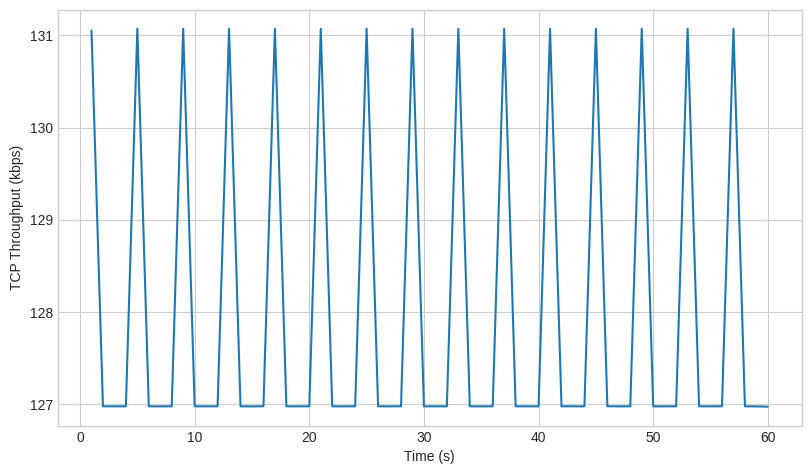

In [53]:
plt.subplots(figsize=(1920*px, 1080*px))
plt.plot(dataset["end"], dataset["bits_per_second"] * 0.001)
plt.xlabel("Time (s)")
plt.ylabel("TCP Throughput (kbps)")
plt.savefig("TCP_Throughput-vs-Time.svg")

#### Retransmits vs Time

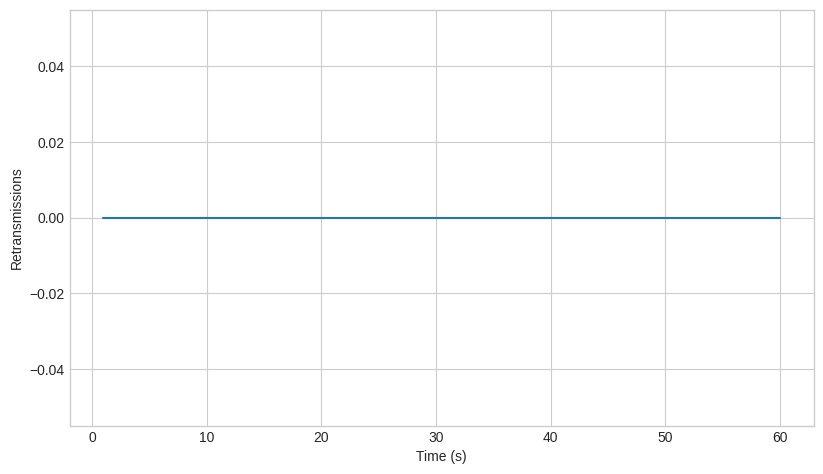

In [54]:
plt.subplots(figsize=(1920*px, 1080*px))
plt.plot(dataset["end"], dataset["retransmits"])
plt.xlabel("Time (s)")
plt.ylabel("Retransmissions")
plt.savefig("Retransmissions-vs-Time.svg")

#### Send CWND vs Time

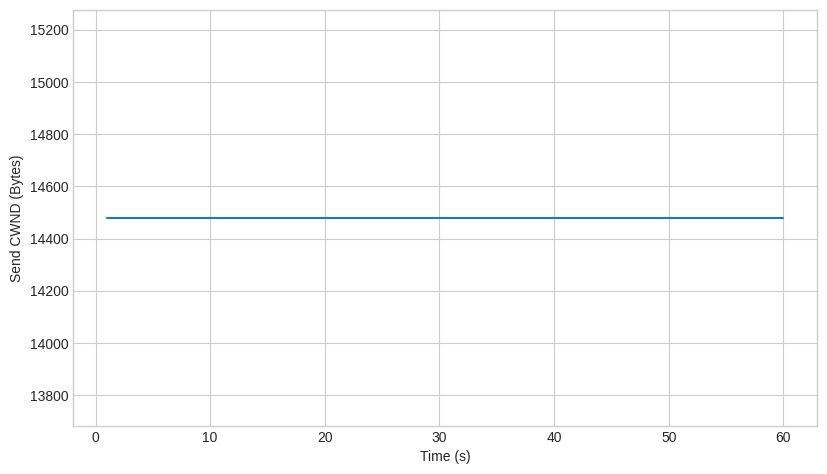

In [55]:
plt.subplots(figsize=(1920*px, 1080*px))
plt.plot(dataset["end"], dataset["snd_cwnd"])
plt.xlabel("Time (s)")
plt.ylabel("Send CWND (Bytes)")
plt.savefig("Send_CWND-vs-Time.svg")

#### RTT vs Time

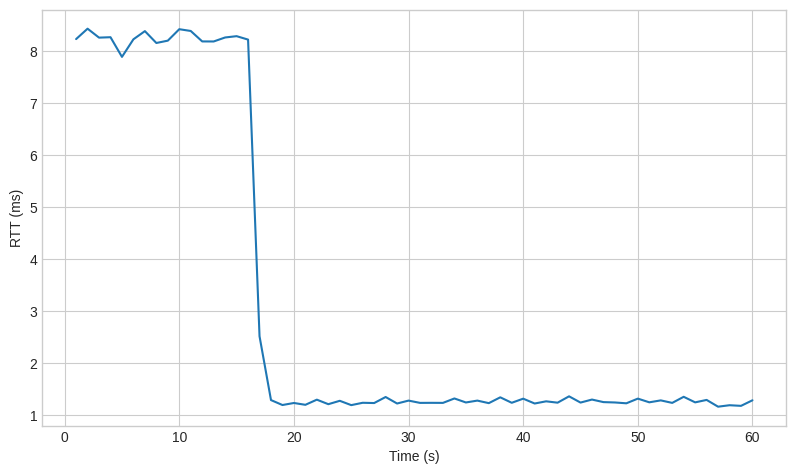

In [56]:
plt.subplots(figsize=(1920*px, 1080*px))
plt.plot(dataset["end"], dataset["rtt"] * 0.001)
plt.xlabel("Time (s)")
plt.ylabel("RTT (ms)")
plt.savefig("RTT-vs-Time.svg")

#### RTT Variance vs Time

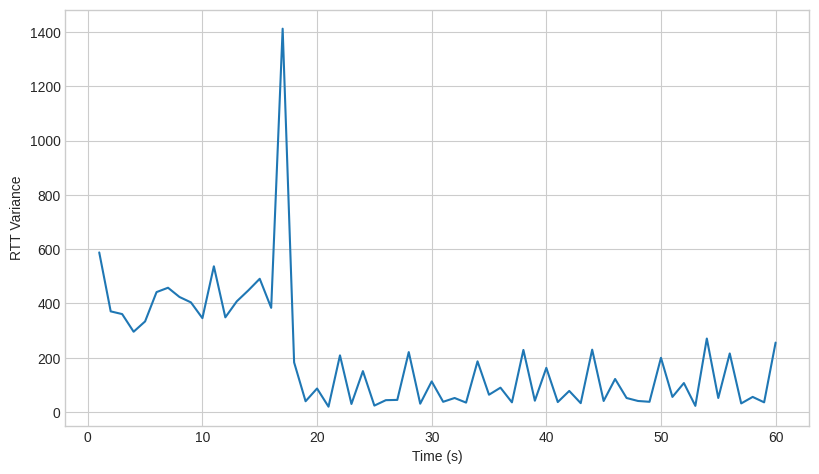

In [57]:
plt.subplots(figsize=(1920*px, 1080*px))
plt.plot(dataset["end"], dataset["rttvar"])
plt.xlabel("Time (s)")
plt.ylabel("RTT Variance")
plt.savefig("RTT_Variance-vs-Time.svg")

#### Bytes (Cumulative) vs Time

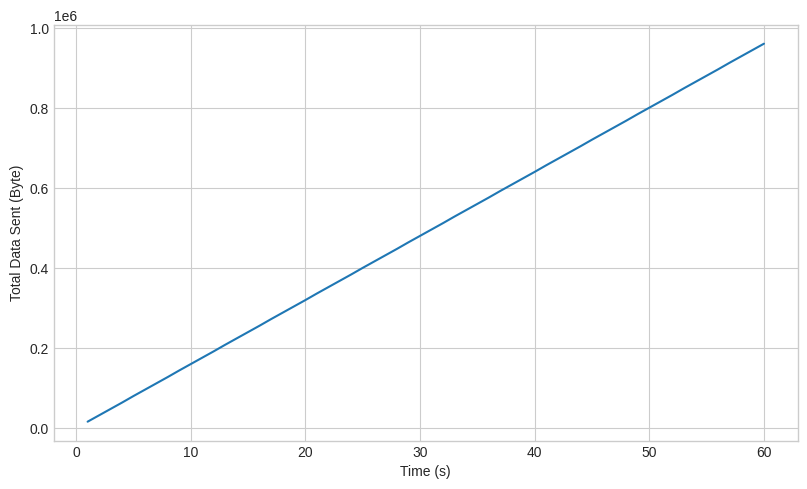

In [58]:
dataset["bytes_cumulative"] = dataset["bytes"].cumsum()

plt.subplots(figsize=(1920*px, 1080*px))
plt.plot(dataset["end"], dataset["bytes_cumulative"])
plt.xlabel("Time (s)")
plt.ylabel("Total Data Sent (Byte)")
plt.savefig("Total_Data_Sent-vs-Time.svg")

#### Retransmits (Cumulative) vs Time

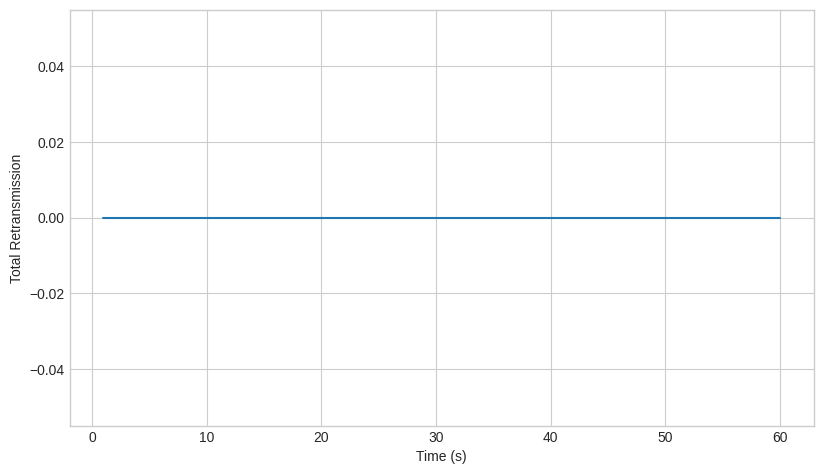

In [59]:
dataset["retransmits_cumulative"] = dataset["retransmits"].cumsum()

plt.subplots(figsize=(1920*px, 1080*px))
plt.plot(dataset["end"], dataset["retransmits_cumulative"])
plt.xlabel("Time (s)")
plt.ylabel("Total Retransmission")
plt.savefig("Total_Retransmissions-vs-Time.svg")